In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint,EarlyStopping

import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
print(train_images.shape)
print(len(train_labels))
print(train_labels)

(60000, 28, 28)
60000
[9 0 0 ... 3 0 5]


In [4]:
print(test_images.shape)
print(len(test_labels))
print(test_labels)

(10000, 28, 28)
10000
[9 2 1 ... 8 1 5]


In [5]:
# 첫번째 이미지의 color depth map (255 depth)
for x in train_images[0]:
  for y in x:
    print('%d\t' % y ,  end='')
  print('\n')

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	

0	0	0	0	0	0	0	0	0	0	0	0	1	0	0	13	73	0	0	1	4	0	0	0	0	1	1	0	

0	0	0	0	0	0	0	0	0	0	0	0	3	0	36	136	127	62	54	0	0	0	1	3	4	0	0	3	

0	0	0	0	0	0	0	0	0	0	0	0	6	0	102	204	176	134	144	123	23	0	0	0	0	12	10	0	

0	0	0	0	0	0	0	0	0	0	0	0	0	0	155	236	207	178	107	156	161	109	64	23	77	130	72	15	

0	0	0	0	0	0	0	0	0	0	0	1	0	69	207	223	218	216	216	163	127	121	122	146	141	88	172	66	

0	0	0	0	0	0	0	0	0	1	1	1	0	200	232	232	233	229	223	223	215	213	164	127	123	196	229	0	

0	0	0	0	0	0	0	0	0	0	0	0	0	183	225	216	223	228	235	227	224	222	224	221	223	245	173	0	

0	0	0	0	0	0	0	0	0	0	0	0	0	193	228	218	213	198	180	212	210	211	213	223	220	243	202	0	

0	0	0	0	0	0	0	0	0	1	3	0	12	219	220	212	218	192	169	227	208	218	224	212	226	197	209	52	

0	0	0	0	0	0	0	0	0	0	6	0	99	244	222	220	218	203	198	221	215	213	222	220	245	119	167	56	

0	0	0	0	0	0	0	0	0	4	0	0	55	2

In [0]:
train_images_orig  = train_images
test_images_orig  = test_images
# 총 6만개의 학습 이미지셋,  28 x 28 = 1차원 속성 갯수(이미지의 픽셀 갯수),  reshape된 이미지를 정규화를 위해 실수로 바꾼 뒤 255로 나눔  =>  0 ~ 1 사이의 값이 됨 (효율성 향상)
train_images = train_images.reshape(train_images.shape[0], train_images.shape[1] * train_images.shape[2]).astype('float32') / 255
test_images = test_images.reshape(test_images.shape[0], test_images.shape[1] * test_images.shape[2]).astype('float32') / 255

In [7]:
# 2차원 이미지를 1차원으로 늘어뜨림 (위의 color depth map에서 96번째 픽셀의 1을 255로 나누면 = 0.0039,  아래의 1차원 벡터에서의 96번째 픽셀값도 마찬가지로 0.0039)
i = 0
for x in train_images[0]:
  print(i)
  print('%.4f\t' % x)
  i += 1

0
0.0000	
1
0.0000	
2
0.0000	
3
0.0000	
4
0.0000	
5
0.0000	
6
0.0000	
7
0.0000	
8
0.0000	
9
0.0000	
10
0.0000	
11
0.0000	
12
0.0000	
13
0.0000	
14
0.0000	
15
0.0000	
16
0.0000	
17
0.0000	
18
0.0000	
19
0.0000	
20
0.0000	
21
0.0000	
22
0.0000	
23
0.0000	
24
0.0000	
25
0.0000	
26
0.0000	
27
0.0000	
28
0.0000	
29
0.0000	
30
0.0000	
31
0.0000	
32
0.0000	
33
0.0000	
34
0.0000	
35
0.0000	
36
0.0000	
37
0.0000	
38
0.0000	
39
0.0000	
40
0.0000	
41
0.0000	
42
0.0000	
43
0.0000	
44
0.0000	
45
0.0000	
46
0.0000	
47
0.0000	
48
0.0000	
49
0.0000	
50
0.0000	
51
0.0000	
52
0.0000	
53
0.0000	
54
0.0000	
55
0.0000	
56
0.0000	
57
0.0000	
58
0.0000	
59
0.0000	
60
0.0000	
61
0.0000	
62
0.0000	
63
0.0000	
64
0.0000	
65
0.0000	
66
0.0000	
67
0.0000	
68
0.0000	
69
0.0000	
70
0.0000	
71
0.0000	
72
0.0000	
73
0.0000	
74
0.0000	
75
0.0000	
76
0.0000	
77
0.0000	
78
0.0000	
79
0.0000	
80
0.0000	
81
0.0000	
82
0.0000	
83
0.0000	
84
0.0000	
85
0.0000	
86
0.0000	
87
0.0000	
88
0.0000	
89
0.0000	
90
0.0000	
91
0.0000

In [8]:
train_labels[0]

9

In [0]:
train_labels_orig = train_labels
test_labels_orig = test_labels
# 원핫 인코딩 : 위에서의 9  =>  0, 0, 0, 0, 0, 0, 0, 0, 0, 1  형태로 변환
train_labels = np_utils.to_categorical(train_labels, 10)
test_labels = np_utils.to_categorical(test_labels, 10)

In [10]:
train_labels[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [11]:
# 입력값 : 784,  layer 1 : 128,  layer 2(출력층) : 10
# 은닉층은 일반적으로 relu를 사용.  multi classification이므로 softmax 사용
model = Sequential()
model.add(Dense(128, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))

W0719 02:27:56.635362 139745219815296 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0719 02:27:56.681825 139745219815296 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0719 02:27:56.690440 139745219815296 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [12]:
# multi classification이므로 categorical_crossentropy 를 사용함
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

W0719 02:27:56.734687 139745219815296 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0719 02:27:56.773348 139745219815296 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [13]:
model.fit(train_images, train_labels, epochs=60, batch_size=500)

W0719 02:27:56.943388 139745219815296 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0719 02:27:57.006031 139745219815296 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/60
60000/60000 [==============================] - 5s 76us/step - loss: 0.7054 - acc: 0.7645
Epoch 2/60
60000/60000 [==============================] - 1s 11us/step - loss: 0.4649 - acc: 0.8410
Epoch 3/60
60000/60000 [==============================] - 1s 11us/step - loss: 0.4228 - acc: 0.8544
Epoch 4/60
60000/60000 [==============================] - 1s 11us/step - loss: 0.3956 - acc: 0.8642
Epoch 5/60
60000/60000 [==============================] - 1s 11us/step - loss: 0.3705 - acc: 0.8718
Epoch 6/60
60000/60000 [==============================] - 1s 11us/step - loss: 0.3651 - acc: 0.8728
Epoch 7/60
60000/60000 [==============================] - 1s 11us/step - loss: 0.3401 - acc: 0.8813
Epoch 8/60
60000/60000 [==============================] - 1s 12us/step - loss: 0.3315 - acc: 0.8838
Epoch 9/60
60000/60000 [==============================] - 1s 11us/step - loss: 0.3234 - acc: 0.8862
Epoch 10/60
60000/60000 [==============================] - 1s 11us/step - loss: 0.3112 - acc: 0.8900

In [14]:
print("Accuracy : %.4f" % (model.evaluate(test_images, test_labels)[1]))

10000/10000 [==============================] - 1s 51us/step
Accuracy : 0.8859


In [0]:
predictions = model.predict(test_images)

In [16]:
predictions

array([[8.63215888e-11, 1.02340142e-12, 8.62215117e-08, ...,
        8.04057810e-04, 1.17258390e-08, 9.99174297e-01],
       [8.16926267e-03, 9.22631231e-15, 9.69963968e-01, ...,
        6.85580072e-18, 3.59814294e-07, 4.54972182e-23],
       [1.03615115e-07, 9.99999881e-01, 7.89434317e-12, ...,
        2.70822982e-16, 2.35004152e-11, 2.51250838e-19],
       ...,
       [1.48163643e-04, 4.18640331e-11, 4.37273520e-05, ...,
        2.61066248e-06, 9.99610007e-01, 1.37618866e-11],
       [3.38761367e-07, 9.99765694e-01, 4.32782450e-08, ...,
        4.50837634e-09, 3.89342460e-08, 7.34443270e-11],
       [3.25132305e-07, 2.59041233e-08, 3.66429703e-07, ...,
        5.34241030e-04, 8.68097559e-05, 4.39656930e-07]], dtype=float32)

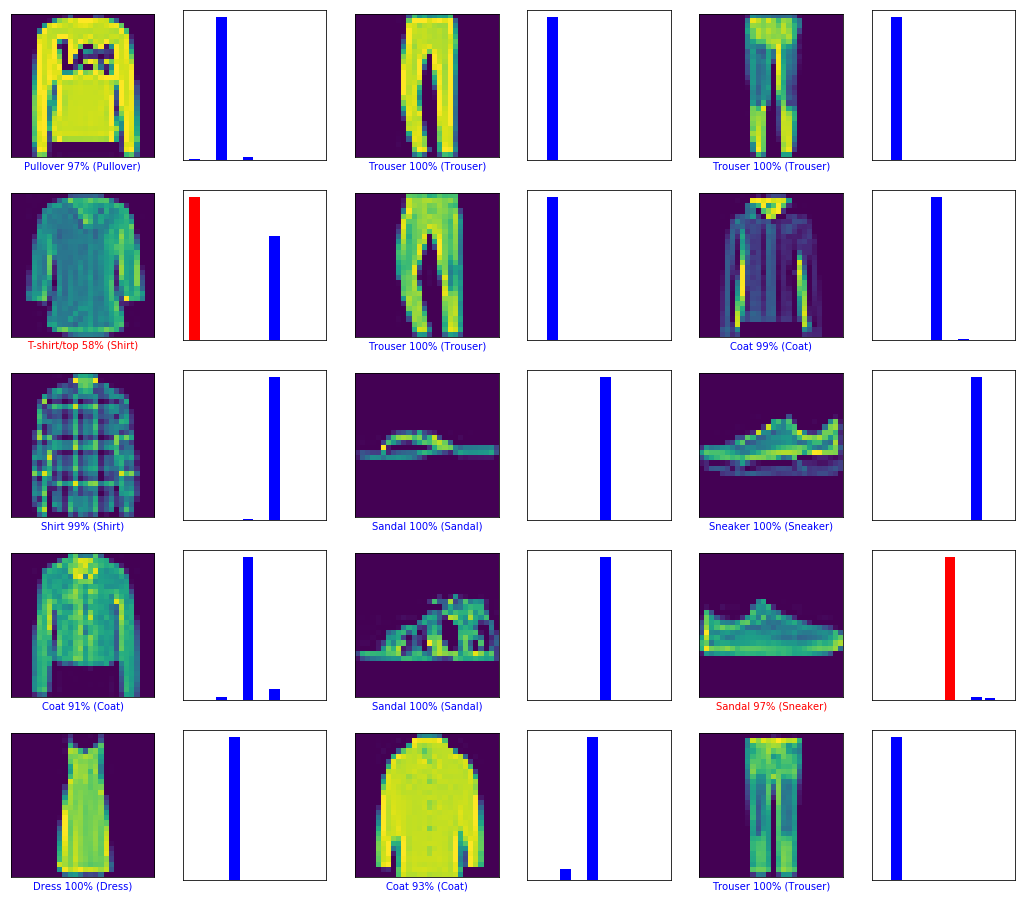

In [18]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"] 
plt.figure(figsize=(18,16))
  
for i in range(1,16):
  prediction = predictions[i]
  true_label = test_labels_orig[i]
  img = test_images_orig[i]
    
  plt.subplot(5,6,i*2 - 1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img)
    
  # 각 테스트 이미지들의 prediction 중 가장 큰 값의 인덱스를 label로 활용    
  predicted_label = np.argmax(prediction)   
     
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],  # 예측한 label 
                                  100*np.max(prediction),               # 예측률
                                  class_names[true_label]),             # 실제 label
                                  color=color)
  plt.subplot(5,6,i*2)
  plt.xticks([])
  plt.yticks([])
  if predicted_label != true_label:
    for j in range(10):
      if j == predicted_label:
        plt.bar(j, predictions[i][j], color='red')
      else:
        plt.bar(j, predictions[i][j], color='blue')
  else:
    for j in range(10):
      plt.bar(j, predictions[i][j], color='blue')
plt.show()